In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Mg all data.xlsx')
df

,Time(min),Scanspeed(mm/s),Fluence (J/cm2),Repetition rate(kHz),Pulsewidth,Power %,DLS (nm),UV peak(nm),UV VIS
0,2,3000,1.83,10,0.6,90,232.5,203.0,0.677
1,5,3000,1.83,10,0.6,90,117.6,203.5,0.580
2,25,3000,1.83,10,0.6,90,78.2,205.0,1.695
3,2,3250,1.83,10,0.6,90,239.8,202.5,0.438
4,5,3250,1.83,10,0.6,90,146.3,205.0,0.833
...,...,...,...,...,...,...,...,...,...
76,5,3250,1.91,10,0.6,100,222.6,202.5,0.632
77,25,3250,1.91,10,0.6,100,106.2,206.5,2.132
78,2,3500,1.91,10,0.6,100,162.4,202.0,0.585
79,5,3500,1.91,10,0.6,100,222.6,203.5,0.987


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time(min)             81 non-null     int64  
 1   Scanspeed(mm/s)       81 non-null     int64  
 2   Fluence (J/cm2)       81 non-null     float64
 3   Repetition rate(kHz)  81 non-null     int64  
 4   Pulsewidth            81 non-null     float64
 5   Power %               81 non-null     int64  
 6   DLS (nm)              81 non-null     float64
 7   UV peak(nm)           81 non-null     float64
 8   UV VIS                81 non-null     float64
dtypes: float64(5), int64(4)
memory usage: 5.8 KB


<h3>Feature Selection:</h3>

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [6]:
X = df.drop(columns=['DLS (nm)', 'UV VIS', 'UV peak(nm)'])
y = df[['DLS (nm)', 'UV VIS', 'UV peak(nm)']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = MSE(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 455.3548562725019


In [8]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
mse_pca = MSE(y_test, y_pred_pca)
print("Mean Squared Error (PCA):", mse_pca)

Mean Squared Error (PCA): 455.35485627250273


In [9]:
print(pca.components_)

[[ 4.15545057e-03 -9.99990526e-01 -9.44979220e-06  0.00000000e+00
   0.00000000e+00 -1.29613894e-03]
 [ 9.99977852e-01  4.14865234e-03  2.02472862e-05 -0.00000000e+00
  -0.00000000e+00  5.20415583e-03]
 [ 5.19872522e-03  1.31776997e-03 -7.97066697e-03 -0.00000000e+00
   0.00000000e+00 -9.99953852e-01]
 [ 2.12304121e-05  9.69834775e-07  9.99968233e-01 -0.00000000e+00
  -0.00000000e+00 -7.97066995e-03]
 [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.00000000e+00
  -0.00000000e+00 -0.00000000e+00]]


In [10]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_
top_features = np.argsort(feature_importances)[::-1][:5]
X_train_rf = X_train.to_numpy()[:, top_features]
X_test_rf = X_test.to_numpy()[:, top_features]
model_rf = LinearRegression()
model_rf.fit(X_train_rf, y_train)
y_pred_rf = model_rf.predict(X_test_rf)
mse_rf = MSE(y_test, y_pred_rf)
print("Mean Squared Error (Random Forest):", mse_rf)

Mean Squared Error (Random Forest): 455.3548562725029


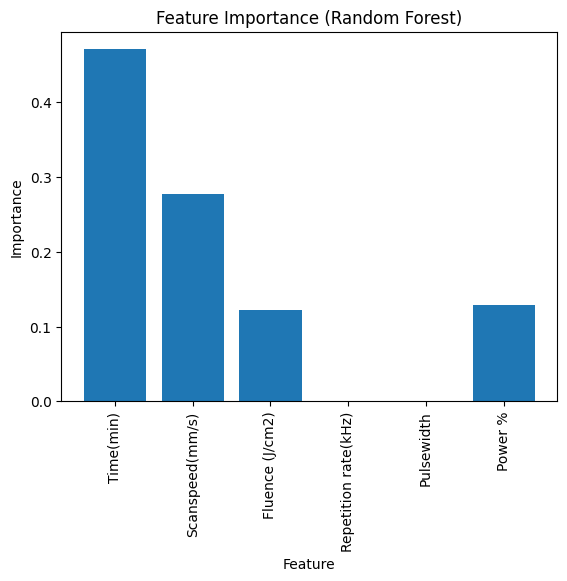

In [11]:
feature_names = X_train.columns
plt.bar(feature_names, feature_importances)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.show()

<h4>Interpretation:</h4>
<li>From the feature elimination it states only 3 features are responsible for prediction</li>